Let's do the same dissociation curves using cc-pvdz as a basis set and choose an active space

In [2]:
from pyscf import gto, scf, mcscf
import numpy as np
import matplotlib.pyplot as plt
from pyscf.tools import molden

In [3]:
H2m = gto.M(atom=[["H", 0, 0, 0],
                  ["H", 1.5, 0, 0]], basis = 'ccpvdz', charge = -1, spin = 1)
uhf=scf.UHF(H2m)
uhf.kernel()

#H2_alpha_coeff=uhf.mo_coeff[0]
#H2_beta_coeff=uhf.mo_coeff[1]
#H2_alpha_en=uhf.mo_energy[0]
#H2_beta_en=uhf.mo_energy[1]
#H2_alpha_occ=uhf.mo_occ[0]
#H2_beta_occ=uhf.mo_occ[1]
#print('Number of alpha coefficients:', len(H2_alpha_coeff))
#print('Alpha orbital energies: ', H2_alpha_en)
#print('Number of beta coefficients:', len(H2_beta_coeff))
#print('Beta orbital energies: ', H2_beta_en)

#with open('H2m_ccpvdz_alpha.molden', 'w') as file_alpha:
 #   molden.header(H2m, file_alpha)
  #  molden.orbital_coeff(H2m, file_alpha, H2_alpha_coeff, ene=H2_alpha_en, occ=H2_alpha_occ)

#with open('H2m_ccpvdz_beta.molden', 'w') as file_beta:
 #   molden.header(H2m, file_beta)
  #  molden.orbital_coeff(H2m, file_beta, H2_beta_coeff, ene=H2_beta_en, occ=H2_beta_occ)





converged SCF energy = -0.97405600177628  <S^2> = 0.75831993  2S+1 = 2.0083027


-0.9740560017762803

In [ ]:
#UCASSCF spc

ncas, nelecas = (5, (2, 1))
ucassolver=mcscf.UCASSCF(uhf, ncas, nelecas)
mo_s = ucassolver.sort_mo([1,2])
ucassolver.kernel(mo_s)


UCASSCF energy = -0.97405600177628
UCASCI E = -0.97405600177628  E(CI) = -1.32684080905628  S^2 = 0.7583199


(-0.97405600177628,
 -1.32684080905628,
 FCIvector([[-1.00000000e+00, -7.63272919e-16]]),
 (array([[ 3.11056226e-01, -3.06094034e-01,  9.22904308e-01,
           9.34423555e-01, -1.96223312e-01, -1.10662682e-16,
          -1.69279678e-16,  8.43528906e-18, -5.95763839e-17,
           4.92824950e-02],
         [ 3.37711699e-01, -7.77766662e-01, -7.51480118e-01,
          -1.27404770e+00,  8.58106644e-02, -1.22693100e-17,
           4.56008547e-17,  4.20227387e-17, -1.03453720e-17,
           3.49144812e-01],
         [-1.09328488e-02,  1.60575918e-02,  8.89810983e-02,
          -4.71653828e-02,  6.29833895e-01,  7.02453080e-16,
           3.88050419e-16, -3.37342726e-16, -1.38009923e-16,
           8.69758388e-01],
         [-2.37342826e-17, -1.58458056e-16, -1.54690175e-16,
           4.52873633e-17, -6.34294460e-16,  6.38656940e-01,
          -2.57967205e-01, -5.60595161e-01, -4.62835419e-01,
          -2.10649849e-16],
         [-4.50345715e-18, -8.21735200e-18,  6.24934912e-17,
     

In [21]:
Euhf_H2 = []
Eucas_H2 = []
mo_s = None
ncas, nelecas = (4, (2, 1))
for a in np.arange(0.8, 4.05, 0.05):
    H2minus = gto.M(atom=[["H", 0, 0, 0],
                          [ "H", a, 0, 0]], basis = 'cc-pvdz', charge = -1, spin = 1)
    uhf =scf.UHF(H2minus)
    Euhf_H2.append(uhf.kernel())
    ucassolver=mcscf.UCASSCF(uhf, ncas, nelecas)
    if mo_s is None:
        mo_s = mcscf.sort_mo(ucassolver, uhf.mo_coeff, [1,2,3,4])
    else: 
        mo_s = mcscf.project_init_guess(ucassolver, mo_s)
    Eucas_H2.append(ucassolver.mc1step(mo_s)[0])

converged SCF energy = -0.94845327316247  <S^2> = 0.75309517  2S+1 = 2.0030928


UCASSCF energy = -0.970668088127243
UCASCI E = -0.970668088127243  E(CI) = -1.63213960177724  S^2 = 0.7506353
converged SCF energy = -0.954784159145989  <S^2> = 0.75272343  2S+1 = 2.0027216
UCASSCF energy = -0.976964187401967
UCASCI E = -0.976964187401967  E(CI) = -1.59952561201373  S^2 = 0.7508802
converged SCF energy = -0.959483965658372  <S^2> = 0.75239186  2S+1 = 2.0023904
UCASSCF energy = -0.981505023416569
UCASCI E = -0.981505023416569  E(CI) = -1.56947970221657  S^2 = 0.7511863
converged SCF energy = -0.963015377944388  <S^2> = 0.75214547  2S+1 = 2.0021443
UCASSCF energy = -0.984764732710419
UCASCI E = -0.984764732710419  E(CI) = -1.5417933757841  S^2 = 0.7515567
converged SCF energy = -0.965707029965991  <S^2> = 0.75202144  2S+1 = 2.0020204
UCASSCF energy = -0.987086260744426
UCASCI E = -0.987086260744426  E(CI) = -1.51626347166443  S^2 = 0.7519893
converged SCF energy = -0.967789257978701  <S^2> = 0.75204558  2S+1 = 2.0020445
UCASSCF energy = -0.988716343124975
UCASCI E = -0.9

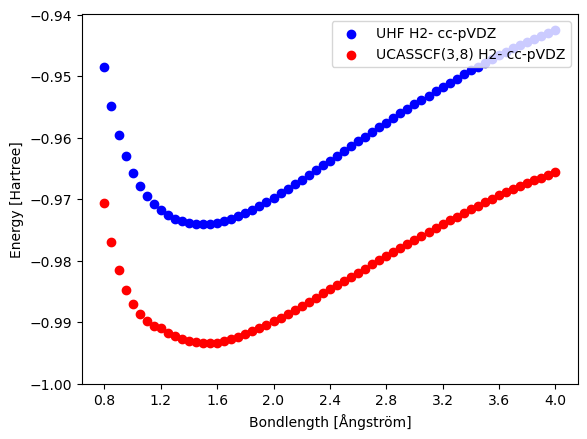

In [22]:
x = np.arange(0.8, 4.05, 0.05)

fig, ax = plt.subplots()
ax.scatter(x, Euhf_H2_6orbs, color='blue', label='UHF H2- cc-pVDZ')
ax.scatter(x, Eucas_H2, color='red', label='UCASSCF(3,8) H2- cc-pVDZ')
ax.legend(loc='upper right')

ax.set_xlabel('Bondlength [Ångström]')
ax.set_ylabel('Energy [Hartree]')
ax.set_xticks(np.arange(0.8, 4.4, 0.4))
ax.set_yticks(np.arange(-0.94, -1.00, -0.01))

let's create molden file for h3 triangular

In [28]:
H3_tri = gto.M(atom=[["H", 0, 0, 0],
                     ["H", 0.87, 0, 0], 
                     ["H", 0.435, 0.7534421013, 0]], basis = 'ccpvdz', charge = 0, spin = 1)
uhf2=scf.UHF(H3_tri)
uhf2.kernel()

H3tri_alpha_coeff=uhf2.mo_coeff[0]
H3tri_beta_coeff=uhf2.mo_coeff[1]
H3tri_alpha_en=uhf2.mo_energy[0]
H3tri_beta_en=uhf2.mo_energy[1]
H3tri_alpha_occ=uhf2.mo_occ[0]
H3tri_beta_occ=uhf2.mo_occ[1]
print('Number of alpha coefficients:', len(H3tri_alpha_coeff))
print('Alpha orbital energies: ', H3tri_alpha_en)
print('Number of beta coefficients:', len(H3tri_beta_coeff))
print('Beta orbital energies: ', H3tri_beta_en)

with open('H3tri_ccpvdz_alpha.molden', 'w') as file_alpha2:
    molden.header(H3_tri, file_alpha2)
    molden.orbital_coeff(H3_tri, file_alpha2, H3tri_alpha_coeff, ene=H3tri_alpha_en, occ=H3tri_alpha_occ)

with open('H3tri_ccpvdz_beta.molden', 'w') as file_beta2:
    molden.header(H3_tri, file_beta2)
    molden.orbital_coeff(H3_tri, file_beta2, H3tri_beta_coeff, ene=H3tri_beta_en, occ=H3tri_beta_occ)

converged SCF energy = -1.48911449708879  <S^2> = 0.75253077  2S+1 = 2.0025292
Number of alpha coefficients: 15
Alpha orbital energies:  [-0.84579315 -0.20441353  0.11111838  0.36554096  0.69621191  0.73221136
  1.03722227  1.5751511   1.58210366  1.82265406  1.85003375  1.85056571
  2.46771604  3.09376167  3.11261659]
Number of beta coefficients: 15
Beta orbital energies:  [-0.77890968  0.13360369  0.18575148  0.3966456   0.74157356  0.80309161
  1.05790031  1.6270856   1.64035053  1.85988719  1.86417658  1.91280815
  2.50437805  3.10452531  3.15748964]


In [31]:
Euhf_H3tri = []
Eucas_H3tri_4orbs = []
Eucas_H3tri_6orbs =[]
mo_4 = None
mo_6 = None
ncas1, nelecas1 = (4, (2, 1))
ncas2, nelecas2 = (6, (2, 1))
for b in np.arange(0.5, 4.05, 0.05):
    H3_tri = gto.M(atom=[["H", 0, 0, 0],
                     ["H", 0.87, 0, 0], 
                     ["H", 0.435, b, 0]], basis = 'ccpvdz', charge = 0, spin = 1)
    uhf =scf.UHF(H3_tri)
    Euhf_H3tri.append(uhf.kernel())
    ucas_4orbs=mcscf.UCASSCF(uhf, ncas1, nelecas1)
    if mo_4 is None:
        mo_4 = mcscf.sort_mo(ucas_4orbs, uhf.mo_coeff, [1,2,3,4])
    if mo_4 is not None: 
        mo_4 = mcscf.project_init_guess(ucas_4orbs, mo_4)
    Eucas_H3tri_4orbs.append(ucas_4orbs.mc1step(mo_4)[0])
    ucas_6orbs=mcscf.UCASSCF(uhf,ncas2, nelecas2)
    if mo_6 is None:
        mo_6 = mcscf.sort_mo(ucas_6orbs, uhf.mo_coeff, [1,2,3,4,5,6])
    if mo_6 is not None: 
        mo_6 = mcscf.project_init_guess(ucas_6orbs, mo_6)
    Eucas_H3tri_6orbs.append(ucas_6orbs.mc1step(mo_6)[0])


converged SCF energy = -1.45053558080422  <S^2> = 0.75441938  2S+1 = 2.0044145


UCASSCF energy = -1.46849175155215
UCASCI E = -1.46849175155215  E(CI) = -3.6736777557549  S^2 = 0.7509669
UCASSCF energy = -1.4811851006875
UCASCI E = -1.4811851006875  E(CI) = -3.68637110489025  S^2 = 0.7503824
converged SCF energy = -1.46790434277252  <S^2> = 0.75484168  2S+1 = 2.0048358
UCASSCF energy = -1.48666412895153
UCASCI E = -1.48666412895153  E(CI) = -3.60419437718976  S^2 = 0.7510198
UCASSCF energy = -1.49928389585717
UCASCI E = -1.49928389585717  E(CI) = -3.61681414409539  S^2 = 0.7504026
converged SCF energy = -1.4797551222776  <S^2> = 0.75538029  2S+1 = 2.0053731
UCASSCF energy = -1.49938715920842
UCASCI E = -1.49938715920842  E(CI) = -3.53572814815638  S^2 = 0.7510839
UCASSCF energy = -1.51192138271029
UCASCI E = -1.51192138271029  E(CI) = -3.54826237165825  S^2 = 0.7504162
converged SCF energy = -1.48684037442859  <S^2> = 0.7560727  2S+1 = 2.0060635
UCASSCF energy = -1.50740949141175
UCASCI E = -1.50740949141175  E(CI) = -3.46883119369613  S^2 = 0.7511593
UCASSCF ener

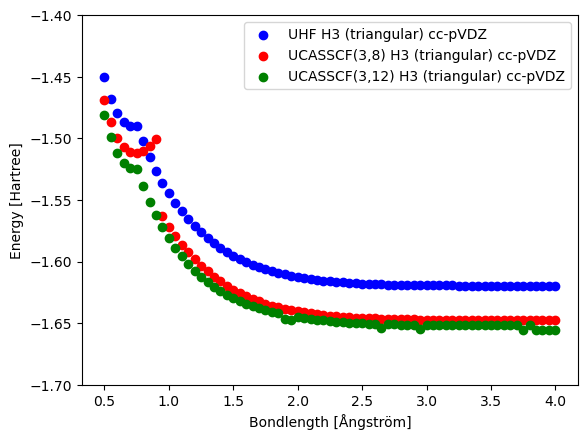

In [34]:
x2 = np.arange(0.5, 4.05, 0.05)

fig, ax = plt.subplots()
ax.scatter(x2, Euhf_H3tri, color='blue', label='UHF H3 (triangular) cc-pVDZ')
ax.scatter(x2, Eucas_H3tri_4orbs, color='red', label='UCASSCF(3,8) H3 (triangular) cc-pVDZ')
ax.scatter(x2, Eucas_H3tri_6orbs, color='green', label='UCASSCF(3,12) H3 (triangular) cc-pVDZ')
ax.legend(loc='upper right')

ax.set_xlabel('Bondlength [Ångström]')
ax.set_ylabel('Energy [Hartree]')
ax.set_xticks(np.arange(0.5, 4.5, 0.5))
ax.set_yticks(np.arange(-1.4, -1.7, -0.05))

Let's do this again for H3 linear

In [37]:
H3_lin = gto.M(atom=[["H", 0, 0, 0],
                     ["H", 0.93, 0, 0], 
                     ["H", -0.93, 0, 0]], basis = 'ccpvdz', charge = 0, spin = 1)
uhf3=scf.UHF(H3_lin)
uhf3.kernel()

H3lin_alpha_coeff=uhf3.mo_coeff[0]
H3lin_beta_coeff=uhf3.mo_coeff[1]
H3lin_alpha_en=uhf3.mo_energy[0]
H3lin_beta_en=uhf3.mo_energy[1]
H3lin_alpha_occ=uhf3.mo_occ[0]
H3lin_beta_occ=uhf3.mo_occ[1]
print('Number of alpha coefficients:', len(H3lin_alpha_coeff))
print('Alpha orbital energies: ', H3lin_alpha_en)
print('Number of beta coefficients:', len(H3lin_beta_coeff))
print('Beta orbital energies: ', H3lin_beta_en)

with open('H3lin_ccpvdz_alpha.molden', 'w') as file_alpha3:
    molden.header(H3_lin, file_alpha3)
    molden.orbital_coeff(H3_lin, file_alpha3, H3lin_alpha_coeff, ene=H3lin_alpha_en, occ=H3lin_alpha_occ)

with open('H3lin_ccpvdz_beta.molden', 'w') as file_beta3:
    molden.header(H3_lin, file_beta3)
    molden.orbital_coeff(H3_lin, file_beta3, H3lin_beta_coeff, ene=H3lin_beta_en, occ=H3lin_beta_occ)

converged SCF energy = -1.60103339552025  <S^2> = 0.78609818  2S+1 = 2.0357782
Number of alpha coefficients: 15
Alpha orbital energies:  [-0.6954784  -0.40683659  0.2300957   0.56252972  0.56701101  0.90855936
  1.16947215  1.16947215  1.48266209  1.48266209  1.69300219  2.13533153
  2.13533153  2.59942391  3.70671737]
Number of beta coefficients: 15
Beta orbital energies:  [-0.59137837  0.06675895  0.26890427  0.6095614   0.66907953  0.98226231
  1.19954336  1.19954336  1.56784608  1.56784608  1.76361368  2.16406244
  2.16406244  2.64955064  3.73615394]


In [41]:
Euhf_H3lin = []
Eucas_H3lin_4orbs = []
Eucas_H3lin_6orbs =[]
mo_4 = None
mo_6 = None
ncas1, nelecas1 = (4, (2, 1))
ncas2, nelecas2 = (6, (2, 1))
for c in np.arange(0.4, 4.05, 0.05):
    H3_lin = gto.M(atom=[["H", 0, 0, 0],
                     ["H", c, 0, 0], 
                     ["H", -c, b, 0]], basis = 'ccpvdz', charge = 0, spin = 1)
    uhf =scf.UHF(H3_lin)
    Euhf_H3lin.append(uhf.kernel())
    ucas_4orbs=mcscf.UCASSCF(uhf, ncas1, nelecas1)
    if mo_4 is None:
        mo_4 = mcscf.sort_mo(ucas_4orbs, uhf.mo_coeff, [1,2,3,4])
    if mo_4 is not None: 
        mo_4 = mcscf.project_init_guess(ucas_4orbs, mo_4)
    Eucas_H3lin_4orbs.append(ucas_4orbs.mc1step(mo_4)[0])
    ucas_6orbs=mcscf.UCASSCF(uhf,ncas2, nelecas2)
    if mo_6 is None:
        mo_6 = mcscf.sort_mo(ucas_6orbs, uhf.mo_coeff, [1,2,3,4,5,6])
    if mo_6 is not None: 
        mo_6 = mcscf.project_init_guess(ucas_6orbs, mo_6)
    Eucas_H3lin_6orbs.append(ucas_6orbs.mc1step(mo_6)[0])

converged SCF energy = -1.41362548741873  <S^2> = 0.75000001  2S+1 = 2


UCASSCF energy = -1.42866871125569
UCASCI E = -1.42866871125569  E(CI) = -3.01297472658598  S^2 = 0.7500000
UCASSCF energy = -1.42900934577706
UCASCI E = -1.42900934577706  E(CI) = -3.01331536110735  S^2 = 0.7500000
converged SCF energy = -1.49419088132613  <S^2> = 0.75000001  2S+1 = 2
UCASSCF energy = -1.51043846803075
UCASCI E = -1.51043846803075  E(CI) = -2.94692042962246  S^2 = 0.7500000
UCASSCF energy = -1.51077730595929
UCASCI E = -1.51077730595929  E(CI) = -2.947259267551  S^2 = 0.7500000
converged SCF energy = -1.54807643996465  <S^2> = 0.75000001  2S+1 = 2
UCASSCF energy = -1.5655662012151
UCASCI E = -1.5655662012151  E(CI) = -2.88353765847481  S^2 = 0.7500000
UCASSCF energy = -1.57739318442173
UCASCI E = -1.57739318442173  E(CI) = -2.89536464168144  S^2 = 0.7500000
converged SCF energy = -1.58358438151056  <S^2> = 0.75000002  2S+1 = 2
UCASSCF energy = -1.60235064252057
UCASCI E = -1.60235064252057  E(CI) = -2.82311107248767  S^2 = 0.7500000
UCASSCF energy = -1.60811944156869


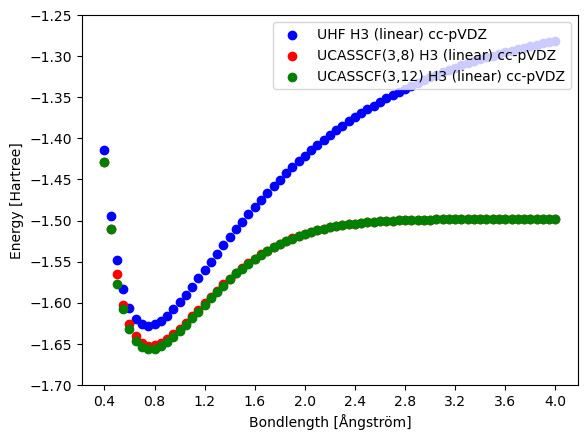

In [44]:
x3 = np.arange(0.4, 4.05, 0.05)

fig, ax = plt.subplots()
ax.scatter(x3, Euhf_H3lin, color='blue', label='UHF H3 (linear) cc-pVDZ')
ax.scatter(x3, Eucas_H3lin_4orbs, color='red', label='UCASSCF(3,8) H3 (linear) cc-pVDZ')
ax.scatter(x3, Eucas_H3lin_6orbs, color='green', label='UCASSCF(3,12) H3 (linear) cc-pVDZ')
ax.legend(loc='upper right')

ax.set_xlabel('Bondlength [Ångström]')
ax.set_ylabel('Energy [Hartree]')
ax.set_xticks(np.arange(0.4, 4.4, 0.4))
ax.set_yticks(np.arange(-1.25, -1.75, -0.05))